* Data from https://opendata.dwd.de/climate_environment/CDC/observations_germany/radiosondes/high_resolution/recent/


In [1]:
using CSV, DataFrames

In [2]:
function read_data(filename)
    stat=CSV.File(joinpath("data",filename),delim=";")|>DataFrame
    stat.AE_GB_POS_withmissings=replace(stat.AE_GB_POS,-999=>missing)
    stat.AE_GL_POS_withmissings=replace(stat.AE_GL_POS,-999=>missing)
    dropmissing!(stat)
    #sonden_aufstiege=groupby(stat,:BEZUGSDATUM_SYNOP)
    return stat
end

read_data (generic function with 1 method)

In [3]:
using GeoMakie

In [4]:
using ArchGDAL
layer=ArchGDAL.getlayer(ArchGDAL.read("../nuts5000_12-31.gk3.shape/nuts5000/NUTS5000_N1.shp"),0)
bounds=DataFrame(layer);
ArchGDAL.createcoordtrans(ArchGDAL.importURL("https://sg.geodatenzentrum.de/web_public/gdz/dokumentation/crs/gk3.prj"), ArchGDAL.importPROJ4("+proj=longlat +datum=WGS84 +no_defs +type=crs")) do transform
    for x in eachrow(bounds)
    ArchGDAL.transform!(x."", transform)
    end
end

In [5]:
all_sonds=DataFrame()
for file in readdir("data")
    all_sonds=vcat(all_sonds,read_data(file))
end

In [8]:
sort!(all_sonds,[:BEZUGSDATUM_SYNOP,:MESSZEITPUNKT])

Row,STATIONS_ID,BEZUGSDATUM_SYNOP,MESSZEITPUNKT,QN_1,AE_GB_POS,AE_GL_POS,AE_GPM,AE_P,AE_TT,AE_RF,AE_TD,AE_FF,AE_DD,eor,AE_GB_POS_withmissings,AE_GL_POS_withmissings
,Int64,Int64,Int64,Int64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Float64,Int64,String3,Float64,Float64
1,1303,2023010100,0,-999,51.4,6.97,147,992.9,15.7,51.0,5.7,5.1,216,eor,51.4,6.97
2,1757,2023010100,0,-999,54.1,13.4,6,1004.1,14.4,80.0,11.0,2.4,186,eor,54.1,13.4
3,2773,2023010100,0,-999,49.43,11.9,416,970.7,9.9,79.0,6.4,2.0,140,eor,49.43,11.9
4,3015,2023010100,0,-999,52.21,14.12,112,998.5,16.2,59.0,8.3,6.0,220,eor,52.21,14.12
5,3231,2023010100,0,-999,50.56,10.38,449,964.5,11.7,77.0,7.8,5.6,187,eor,50.56,10.38
6,3631,2023010100,0,-999,53.71,7.15,9,1000.9,11.7,80.0,8.4,4.4,225,eor,53.71,7.15
7,3715,2023010100,0,-999,48.24,11.55,496,963.2,8.7,80.0,5.5,0.9,123,eor,48.24,11.55
8,4928,2023010100,0,-999,48.83,9.2,323,981.7,12.6,74.0,8.1,3.4,164,eor,48.83,9.2
9,3015,2023010100,1,-999,52.21,14.12,116,998.1,16.3,59.0,8.4,5.2,221,eor,52.21,14.12


In [40]:
using GLMakie

In [43]:
GLMakie.activate!()

In [89]:
fig=Figure()
ax=Axis3(fig[1,1],limits=(5.5,15.5,46.9,55.1,0,nothing),width=800,height=800,xlabel="",ylabel="",zlabel="kilometer height",zticks=([1*10^4,2*10^4,3*10^4],["10","20","30"]))
p=poly!(ax,GeoMakie.to_multipoly.(GeoMakie.geo2basic.(bounds."")),color=:transparent,strokecolor=:black,strokewidth=1)
translate!(p,0,0,0)
Label(fig[3,1],text="Data: © Deutscher Wetterdienst\nGeodata: © GeoBasis-DE / BKG (2023)",justification=:left)
hidespines!(ax)
hidedecorations!(ax,ticks=false,label=false,ticklabels=false)

    s=scatter!(ax,all_sonds.AE_GL_POS[1:end],all_sonds.AE_GB_POS[1:end],all_sonds.AE_GPM[1:end],color= all_sonds.AE_TT[1:end],colorrange=(-50,20),colormap=cgrad(:lajolla,alpha=0.05),markersize=1)

    Colorbar(fig[2,1],s,vertical=false,label="Temperature in °C")
Makie.resize_to_layout!(fig)

             fig

In [85]:
save("radiosondes.png",fig)

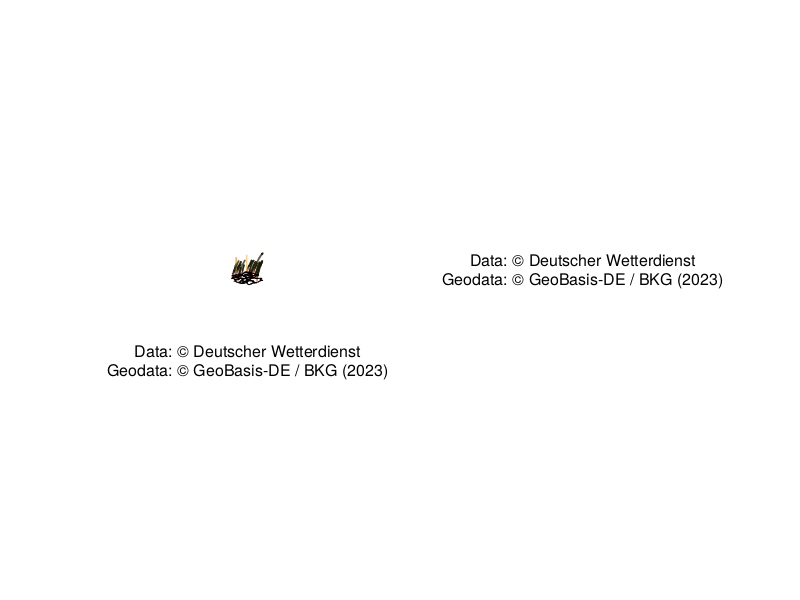

In [51]:

fig

In [46]:
for (i,q) in enumerate(all_sonds)
    for g in all_sonds[i]
            if startswith(string(g.BEZUGSDATUM_SYNOP[1]),Dates.format(Date(2023,1,1),"yyyymmdd"))
            lines!(g.AE_GL_POS,g.AE_GB_POS,g.AE_GPM,color=g.AE_TT,colorrange=(-50,30),colormap=cgrad(:lajolla,alpha=0.7),markersize=1)
            break
        end
    end
    end

In [39]:
using CairoMakie

In [40]:
CairoMakie.activate!()